In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [5]:
df = pd.read_csv('sales_data_sample.csv', encoding='unicode_escape')

In [7]:
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [8]:
df.drop(columns=['ADDRESSLINE1', 'ADDRESSLINE2', 'POSTALCODE', 'CITY', 'PRODUCTLINE', 'PRODUCTCODE', 'COUNTRY', 'DEALSIZE',
                 'TERRITORY', 'PHONE', 'STATE', 'CONTACTFIRSTNAME', 'CONTACTLASTNAME', 'CUSTOMERNAME', 'ORDERNUMBER', 
                 'ORDERDATE', 'STATUS', 'MONTH_ID', 'QTR_ID', 'YEAR_ID'], inplace=True)

In [9]:
df.head()

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,MSRP
0,30,95.70,2,2871.00,95
1,34,81.35,5,2765.90,95
2,41,94.74,2,3884.34,95
3,45,83.26,6,3746.70,95
4,49,100.00,14,5205.27,95


In [10]:
df = StandardScaler().fit_transform(df)

In [11]:
wcss = []
for k in range(1, 15):
    kmeans = KMeans(n_clusters=k, random_state=15)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)

Text(0, 0.5, 'WCSS')

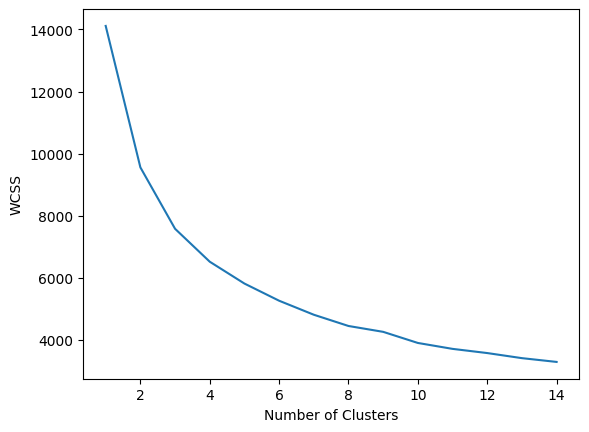

In [13]:
sns.lineplot(x=range(1, 15), y=wcss)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')

In [39]:
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(df)

<Axes: >

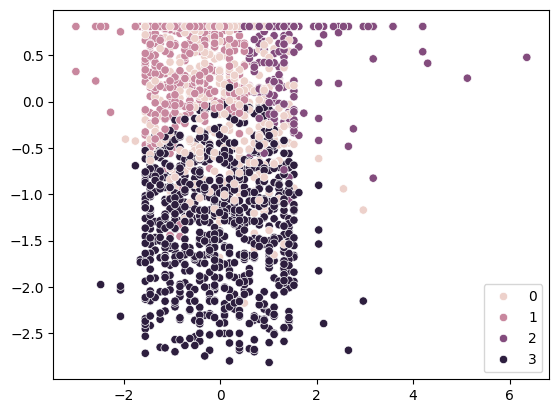

In [41]:

sns.scatterplot(x=df[:, 0], y=df[:, 1], hue=clusters)

In [36]:
silhouette_avg = silhouette_score(kmeans.labels_.reshape(-1,1), kmeans.labels_)
print(f'Silhouette Score: {silhouette_avg:.3f}')

Silhouette Score: 1.000
